<div style="Tamplaged                                                                              ">
<b><center><font size="4">Practical Project 2</font></center></b>
<b><center><font size="3">Classification</font></center></b>
<b><center><font size="2">MNIST Dataset</font></center></b>


</div>

**Notebook Developed by**: [Rene Jerez](https://github.com/renejerez)<br>
**email:**  rene.jerez@ubi.pt<br>

<h1>Title of your summary<span class="tocSkip"></span></h1>
<div class="toc">
  <ul class="toc-item">
    <li><span><a href="#Setup-and-Load-Data" data-toc-modified-id="Setup-and-Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup and Load Data</a></span>
      <div class="toc">
        <ul class="toc-item">
    <li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Libraries</a></span>
    </li>
    <li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load Data</a></span>
    </li>
    <li><span><a href="#Transformed-Data" data-toc-modified-id="Transformed-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Transformed Data</a></span>
    </li>
        </ul>
      </div>
    </li>
    <li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span>
      <div class="toc">
        <ul class="toc-item">
    <li><span><a href="#Convert-all-the-data-to-numeric-values" data-toc-modified-id="Convert-all-the-data-to-numeric-values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Convert all the data to numeric values</a></span>
    </li>
    <li><span><a href="#Check-if-there-are-any-missing/NULL-values" data-toc-modified-id="Check-if-there-are-any-missing/NULL-values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Check if there are any missing/NULL values</a></span>
    </li>
    <li><span><a href="#Obtain-the-histogram-of-each-feature,-using" data-toc-modified-id="Obtain-the-histogram-of-each-feature,-using-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Obtain the histogram of each feature, using</a></span>
    </li>
    <li><span><a href="#Analyze-the-correlation-between-features" data-toc-modified-id="Analyze-the-correlation-between-features-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Analyze the correlation between features</a></span>
    </li>
        </ul>
      </div>
    </li>
    <li><span><a href="#Implement-a-linear_regression.py-script" data-toc-modified-id="Implement-a-linear_regression.py-script-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Implement a linear_regression.py script</a></span>
      <div class="toc">
        <ul class="toc-item">
    <li><span><a href="#Build-Math-Functions-Multiple-Variable" data-toc-modified-id="Build-Math-Functions-Multiple-Variable-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Build Math Functions Multiple Variable</a></span>
    </li>
    <li><span><a href="#Raw-data-and-aplly-Functions" data-toc-modified-id="Raw-data-and-aplly-Functions-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Raw data and aplly Functions</a></span>
    </li>
    <li><span><a href="#Run-Model" data-toc-modified-id="Run-Model-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Run Model</a></span>
    </li>
    <li><span><a href="#Normalize-data-and-aplly-Functions" data-toc-modified-id="Normalize-data-and-aplly-Functions-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Normalize data and aplly Functions</a></span>
    </li>
        </ul>
      </div>
    </li>
    <li><span><a href="#Implement-k-fold" data-toc-modified-id="Implement-k-fold-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Implement k-fold</a></span>
    </li>
    <li><span><a href="#Performance-between-different-folds" data-toc-modified-id="Performance-between-different-folds-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Performance between different folds</a></span>
    </li>
    <li><span><a href="#Polynomial-Model" data-toc-modified-id="Polynomial-Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Polynomial Model</a></span>
    </li>
  </ul>
</div>


## Make a summary

In [1]:
# Add the directory
import sys
import os
sys.path.append(r'C:\Users\rene_\01-Python\ubi-master-computer-engineering')

# Import the module
from general_tools import summary_create

In [2]:


# Create the summary writing the sections and subsections below:
sections = [
    ("Setup and Load Data", [
        ("Install Libraries", []),
        ("Import Libraries", []),        
        ("Load Data", []),
        ("Transformed Data", [])
    ]),
    ("Exploratory Data Analysis", [
        ("Convert all the data to numeric values", []),
        ("Check if there are any missing/NULL values", []),
        ("Obtain the histogram of each feature, using", []),
        ("Analyze the correlation between features", [])
    ]),
    ("Implement a linear_regression.py script", [
        ("Build Math Functions Multiple Variable", []),
        ("Raw data and aplly Functions", []),
        ("Run Model", []),
        ("Normalize data and aplly Functions", [])                        
    ]),
    ("Implement k-fold", [
    ]),
    ("Performance between different folds", [
    ]),
    ("Polynomial Model", [
    ])
]

In [3]:
summary = summary_create(sections)
print(summary)

<h1>Title of your summary<span class="tocSkip"></span></h1>
<div class="toc">
  <ul class="toc-item">
    <li><span><a href="#Setup-and-Load-Data" data-toc-modified-id="Setup-and-Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup and Load Data</a></span>
      <div class="toc">
        <ul class="toc-item">
    <li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Libraries</a></span>
    </li>
    <li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load Data</a></span>
    </li>
    <li><span><a href="#Transformed-Data" data-toc-modified-id="Transformed-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Transformed Data</a></span>
    </li>
        </ul>
      </div>
    </li>
    <li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp

## Setup and Load Data

In [4]:
##########################################################
# Contains Solutions and Notes based on Machine Learning Specialization by Andrew NG
##########################################################

### Install libraries

In [5]:
!pip install tensorflow

### Import libraries

In [40]:
##########################################################
# Import Libraries to start work
##########################################################
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import argparse
import sklearn as sk
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
import tensorflow as tf


### Load Data

In [7]:
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-o", "--output", required=False, help="path to the output loss/accuracy plot")
args, unknown = ap.parse_known_args()



In [8]:
##########################################################
# Function to load mnist dataset
##########################################################
# grab the MNIST dataset 
((trainX, trainY), (testX, testY)) = mnist.load_data()


### Transformed Data

In [9]:
##########################################################
# Flatten the image to be simple list of 28x28=784 pixels
##########################################################
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

In [10]:
##########################################################
# scale data to the range of [0, 1]
##########################################################
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [11]:

##########################################################
# convert the labels from integers to vectors
##########################################################
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

## Implement a classification model

### Define Network Architecture

In [33]:
##########################################################
# Define large model architectures using Keras
##########################################################
def create_model_large(activation):
    model = Sequential([
        Dense(256, input_shape=(784,), activation=activation),
        Dense(128, activation=activation),
        Dense(10, activation="softmax")
    ])
    return model


In [34]:
##########################################################
# Define small model architectures using Keras
##########################################################
def create_model_small(activation):
    model = Sequential([
        Dense(5, input_shape=(784,), activation=activation),
        Dense(3, activation=activation),
        Dense(10, activation="softmax")
    ])
    return model

In [35]:
##########################################################
# Define large model architectures using LeakyReLU Keras
##########################################################
def create_model_large_leaky():
    model = Sequential([
        Dense(256, input_shape=(784,)),
        LeakyReLU(alpha=0.01),
        Dense(128),
        LeakyReLU(alpha=0.01),
        Dense(10, activation="softmax")
    ])
    return model


In [36]:
##########################################################
# Define small model architectures using LeakyReLU Keras
##########################################################
def create_model_small_leaky():
    model = Sequential([
        Dense(5, input_shape=(784,)),
        LeakyReLU(alpha=0.01),
        Dense(3),
        LeakyReLU(alpha=0.01),
        Dense(10, activation="softmax")
    ])
    return model

### Train the network

In [37]:
##########################################################
# # Compile and train the model
##########################################################
def compile_and_train(model, trainX, trainY, testX, testY, epochs=20, batch_size=128):
    model.compile(optimizer=SGD(0.01), loss="categorical_crossentropy", metrics=["accuracy"])
    history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=epochs, batch_size=batch_size, verbose=0)
    return history

In [38]:
##########################################################
# Train all models
##########################################################
histories = {
    "Sigmoid Large": compile_and_train(create_model_large("sigmoid"), trainX, trainY, testX, testY),
    "Sigmoid Small": compile_and_train(create_model_small("sigmoid"), trainX, trainY, testX, testY),
    "ReLU Large": compile_and_train(create_model_large("relu"), trainX, trainY, testX, testY),
    "ReLU Small": compile_and_train(create_model_small("relu"), trainX, trainY, testX, testY),
    "Leaky ReLU Large": compile_and_train(create_model_large_leaky(), trainX, trainY, testX, testY),
    "Leaky ReLU Small": compile_and_train(create_model_small_leaky(), trainX, trainY, testX, testY)
}

c:\Users\rene_\anaconda3\envs\scraper\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\rene_\anaconda3\envs\scraper\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [41]:
##########################################################
# Comparison table with the accuracy
##########################################################
comparison_data = []
for name, history in histories.items():
    final_train_acc = history.history["accuracy"][-1]
    final_test_acc = history.history["val_accuracy"][-1]
    final_train_loss = history.history["loss"][-1]
    final_test_loss = history.history["val_loss"][-1]
    comparison_data.append([name, final_train_acc, final_test_acc, final_train_loss, final_test_loss])

comparison_df = pd.DataFrame(comparison_data, columns=["Model", "Train Accuracy", "Test Accuracy", "Train Loss", "Test Loss"])
print(comparison_df)

              Model  Train Accuracy  Test Accuracy  Train Loss  Test Loss
0     Sigmoid Large        0.866200         0.8733    0.505031   0.482196
1     Sigmoid Small        0.425333         0.4318    1.786263   1.771399
2        ReLU Large        0.955167         0.9533    0.157715   0.159388
3        ReLU Small        0.793067         0.7929    0.768278   0.751430
4  Leaky ReLU Large        0.955717         0.9538    0.156473   0.159815
5  Leaky ReLU Small        0.644000         0.6492    1.108964   1.092275


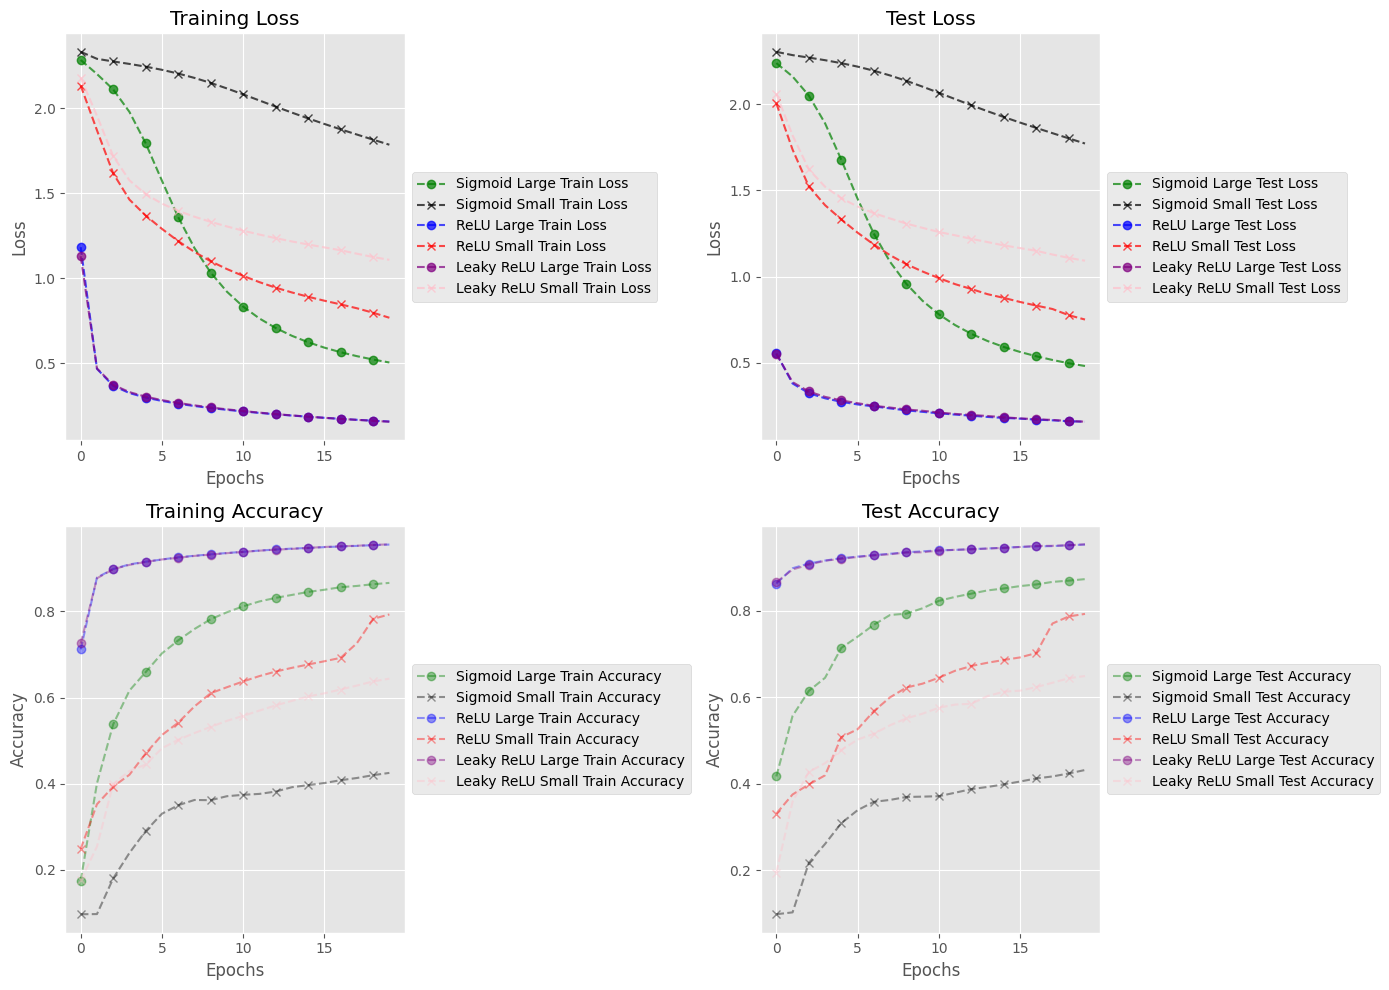

In [47]:
# Split the plot into 4 subplots for accuracy and loss
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
epochs = range(20)

# Colors dictionary for easy reference
colors = {
    "Sigmoid Large": "green", "Sigmoid Small": "black",
    "ReLU Large": "blue", "ReLU Small": "red",
    "Leaky ReLU Large": "purple", "Leaky ReLU Small": "pink"
}

# Plot Training Loss
for name, history in histories.items():
    linestyle = "solid" if "Train" in name else "dashed"
    marker = "o" if "Large" in name else "x"  # Distinguish large models with markers
    axs[0, 0].plot(epochs, history.history["loss"], label=f"{name} Train Loss", color=colors[name], linestyle=linestyle, marker=marker, markevery=2, alpha=0.7)
axs[0, 0].set_title("Training Loss")
axs[0, 0].set_xlabel("Epochs")
axs[0, 0].set_ylabel("Loss")
axs[0, 0].legend(loc="center left", bbox_to_anchor=(1, 0.5))  # Position legend to the right

# Plot Test Loss
for name, history in histories.items():
    linestyle = "solid" if "Train" in name else "dashed"
    marker = "o" if "Large" in name else "x"  # Distinguish large models with markers
    axs[0, 1].plot(epochs, history.history["val_loss"], label=f"{name} Test Loss", color=colors[name], linestyle=linestyle, marker=marker, markevery=2, alpha=0.7)
axs[0, 1].set_title("Test Loss")
axs[0, 1].set_xlabel("Epochs")
axs[0, 1].set_ylabel("Loss")
axs[0, 1].legend(loc="center left", bbox_to_anchor=(1, 0.5))  # Position legend to the right

# Plot Training Accuracy
for name, history in histories.items():
    linestyle = "solid" if "Train" in name else "dashed"
    marker = "o" if "Large" in name else "x"  # Distinguish large models with markers
    axs[1, 0].plot(epochs, history.history["accuracy"], label=f"{name} Train Accuracy", color=colors[name], linestyle=linestyle, marker=marker, markevery=2, alpha=0.4)
axs[1, 0].set_title("Training Accuracy")
axs[1, 0].set_xlabel("Epochs")
axs[1, 0].set_ylabel("Accuracy")
axs[1, 0].legend(loc="center left", bbox_to_anchor=(1, 0.5))  # Position legend to the right

# Plot Test Accuracy
for name, history in histories.items():
    linestyle = "solid" if "Train" in name else "dashed"
    marker = "o" if "Large" in name else "x"  # Distinguish large models with markers
    axs[1, 1].plot(epochs, history.history["val_accuracy"], label=f"{name} Test Accuracy", color=colors[name], linestyle=linestyle, marker=marker, markevery=2, alpha=0.4)
axs[1, 1].set_title("Test Accuracy")
axs[1, 1].set_xlabel("Epochs")
axs[1, 1].set_ylabel("Accuracy")
axs[1, 1].legend(loc="center left", bbox_to_anchor=(1, 0.5))  # Position legend to the right

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [49]:
!python classification.py --topology 53

Epoch 1/20

  1/469 ━━━━━━━━━━━━━━━━━━━━ 5:03 649ms/step - accuracy: 0.1250 - loss: 2.3085
  4/469 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.1032 - loss: 2.3111   
  2/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1152 - loss: 2.3111 
  5/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.0985 - loss: 2.3114
 20/469 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0975 - loss: 2.3048 
 19/469 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0975 - loss: 2.3048
 41/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0959 - loss: 2.2981
 43/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0959 - loss: 2.2978
 40/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0959 - loss: 2.2981
 42/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0959 - loss: 2.2978
 69/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0976 - loss: 2.2905
 68/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0975 - loss: 2.2908
 70/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0978 - loss: 2.2900
 7

2024-10-30 02:32:46.221083: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-30 02:32:48.482384: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
c:\Users\rene_\anaconda3\envs\scraper\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-10-30 02:32:57.833557: I tensorflow/core/platform/cpu_featur